In [11]:
import pandas as pd
from scipy.stats import shapiro

In [12]:
with_tree_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Relative humidity/X Relative Humidity.xlsx")
full_green_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Relative humidity/Y Relative Humidity.xlsx")
no_greenery_df = pd.read_excel("C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Relative humidity/Z Relative Humidity.xlsx")


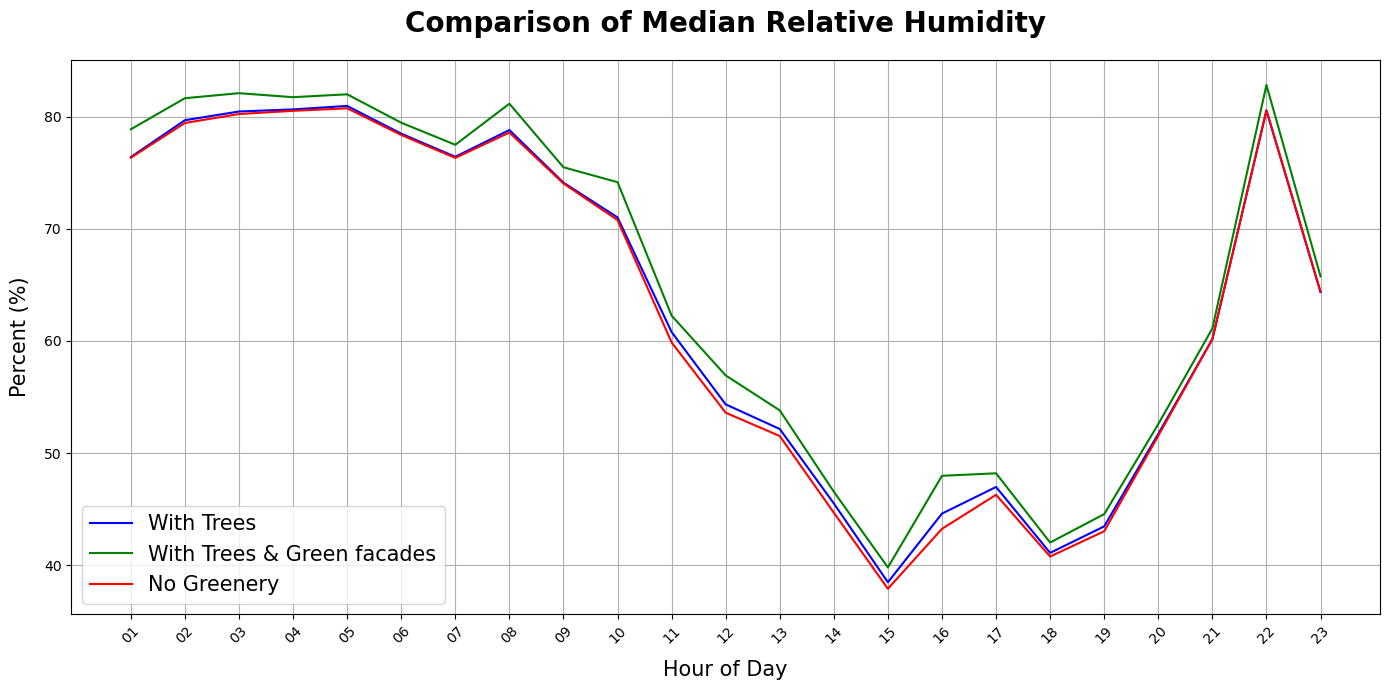

In [13]:
# Calculating median temperature at each time point across all buildings for each scenario
with_tree_median_temp_time = with_tree_df.drop(['Date', 'Time'], axis=1).median(axis=1)
full_green_median_temp_time = full_green_df.drop(['Date', 'Time'], axis=1).median(axis=1)
no_greenery_median_temp_time = no_greenery_df.drop(['Date', 'Time'], axis=1).median(axis=1)

# Extracting time from one of the datasets (assuming all have the same time points)
time_points = with_tree_df['Time'].str.slice(0, 5)  # Simplified time format for readability

#Plotting the medians
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting median temperatures
time_points_hours = with_tree_df['Time'].str.slice(0, 2)  # This gets HH part if format is HH:MM:SS or similar
unique_sorted_hours = sorted(time_points_hours.unique())

# Plotting median temperatures with hours on the x-axis
plt.figure(figsize=(14, 7))
plt.plot(unique_sorted_hours, with_tree_median_temp_time, label='With Trees', color='blue')
plt.plot(unique_sorted_hours, full_green_median_temp_time, label='With Trees & Green facades', color='green')
plt.plot(unique_sorted_hours, no_greenery_median_temp_time, label='No Greenery', color='red')

plt.title('Comparison of Median Relative Humidity', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=15, labelpad=10)
plt.ylabel('Percent (%)', fontsize=15, labelpad=10)
plt.xticks(rotation=45)  # Might adjust based on your preference
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()

plt.savefig('C:/Users/golna.GOLNAZ/Desktop/Result/Atmosphere/Relative humidity/Relative humidity_Comparison.png', dpi=600)

plt.show()

In [16]:
#calculate the time with maximum absolute value

# Calculate absolute differences between each pair of scenarios at each time point
diff_with_tree_full_green = abs(with_tree_median_temp_time - full_green_median_temp_time)
diff_with_tree_no_greenery = abs(with_tree_median_temp_time - no_greenery_median_temp_time)
diff_full_green_no_greenery = abs(full_green_median_temp_time - no_greenery_median_temp_time)

# Sum these differences to get a total difference value for each time point
total_diff = diff_with_tree_full_green + diff_with_tree_no_greenery + diff_full_green_no_greenery

# Find the time point with the maximum total difference
max_diff_index = total_diff.idxmax()  # Index of the maximum difference
max_diff_time = time_points.iloc[max_diff_index]  # Time corresponding to the maximum difference

print(f"Maximum difference between the scenarios occurs at: {max_diff_time}")

Maximum difference between the scenarios occurs at: 16.00


In [17]:
# Calculate the difference
with_tree_df['Time'] = with_tree_df['Time'].astype(str)
full_green_df['Time'] = full_green_df['Time'].astype(str)
no_greenery_df['Time'] = no_greenery_df['Time'].astype(str)

specific_hour = '16.00'  # Adjusted based on the observed format

with_trees_green_facades_at_hour = full_green_df[full_green_df['Time'].str.startswith(specific_hour)]
no_greenery_at_hour = no_greenery_df[no_greenery_df['Time'].str.startswith(specific_hour)]

# Calculate median relative humidity at the specified hour for each scenario
median_with_trees_green_facades = with_trees_green_facades_at_hour.drop(['Date', 'Time'], axis=1).median(axis=1).median()
median_no_greenery = no_greenery_at_hour.drop(['Date', 'Time'], axis=1).median(axis=1).median()


difference = median_with_trees_green_facades - median_no_greenery

difference

4.730000000000004